![](2022-03-15-18-47-31.png)

In [79]:
from dataclasses import dataclass
from sympy import symbols, Symbol
import networkx as nx
import matplotlib.pyplot as plt

In [64]:
@dataclass(frozen=True)
class Joint:
    def __init__(self, v):
        self.v = tuple(v)

    def __mul__(self, other):
        if isinstance(other, Joint):
            return Joint(self.v + other.v)
        return Joint(self.v + (other,))

In [68]:
@dataclass(frozen=True)
class N:
    x: Symbol
    m: Symbol
    s: Symbol

    def __mul__(self, other):
        if not isinstance(other, N):
            raise TypeError(f"Cannot multiply {type(self)} with {type(other)}")
        s3 = 1/(1/self.s + 1/other.s)
        m3 = s3*(self.m/self.s + other.m/other.s)
        return Joint([N(self.m, other.m, self.s + other.s), N(self.x, m3, s3)])
    
    def __contains__(self, x):
        return (self.x == x) or (self.m == x) or (self.s == x)

In [71]:
def marginal(joint, x):
    assert isinstance(joint, Joint)
    constants = Joint([n for n in joint.v if x not in n])
    dist = [n for n in joint.v if x in n]
    assert len(dist) == 2
    marginalized = (dist[0] * dist[1]).v[0]
    return constants * marginalized

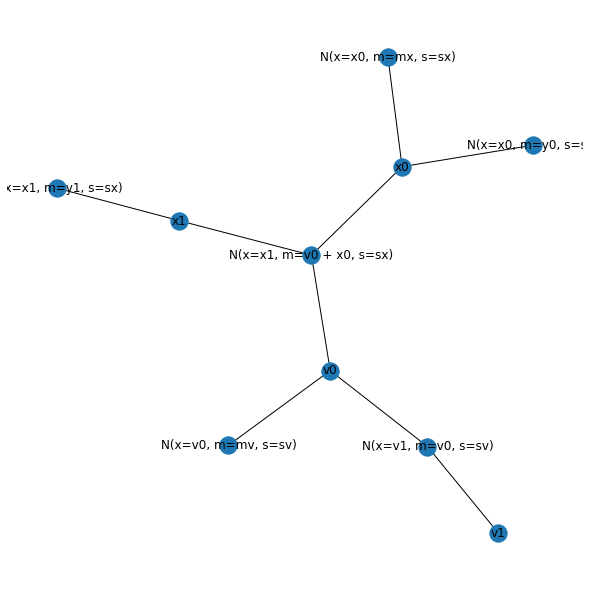

In [88]:
y0, y1, x0, x1, v0, v1, sy, sx, sv, mx, mv = symbols('y0 y1 x0 x1 v0 v1 sy sx sv mx mv')

fy0 = N(x0, y0, sy)
fy1 = N(x1, y1, sx)
fx0 = N(x0, mx, sx)
fx1 = N(x1, x0 + v0, sx)
fv0 = N(v0, mv, sv)
fv1 = N(v1, v0, sv)

g = nx.Graph()
g.add_edge(fy0, x0)
g.add_edge(fx0, x0)
g.add_edge(fx1, x0)
g.add_edge(fx1, x1)
g.add_edge(fy1, x1)
g.add_edge(fx1, v0)
g.add_edge(fv0, v0)
g.add_edge(fv1, v0)
g.add_edge(fv1, v1)

plt.figure(figsize=(8, 8))
pos = nx.kamada_kawai_layout(g)
nx.draw(g, pos=pos)
nx.draw_networkx_labels(g, pos=pos)
plt.show()